In [1]:
%autosave 0

Autosave disabled


## Lab 1: unassessed
# Introduction to Juypter, Python and Numpy

This lab is intended to introduce you to the basic use of the Juypter+Python+Numpy environment, and show how the autograding in exercises works.

When you complete this exercise, you will submit it on Moodle. You will get a mark, but this **will not count towards your final grade**. 

It is strongly recommended that you complete this exercise fully. This will take around 2-3 hours.

## Outline

* Using Jupyter
* A quick NumPy tutorial
* NumPy questions

# Jupyter
If you have not used Jupyter before [jump to the Jupyter Quickstart](guides/JupyterBasics.ipynb) before continuing. If you have done Level 1 Computing Science, you do not need to do this.

# YACRS
DF(H) uses a class response system to administer quizzes during lectures. These will count for 5% of your final grade. Question responses will be entered on your phone during lectures. To set this up:

* **On your phone, not this computer** go to `learn.gla.ac.uk/yacrs`
* Log in using your GUID (MyCampus login), not your DCS login.
* **Bookmark this page so you can return quickly in lectures.**
* Join `Session 4`; this will be the session for all of DF(H)
* Answer the question about your Python experience.                                             



## Autograder tests

Lab exercises will (mainly) be autograded via automatic tests.

The following parts have some questions to answer, and some tests (which you cannot alter) which will be run against the code you have written. If the tests pass, you will see how many marks you got with a green tick. If they do not pass, you will see a red cross. Remember, this exercise doesn't count for anything, but do try to complete the exercises.

In [82]:
from utils.tick import reset_marks, summarise_marks, marks
from utils.checkarr import array_hash, check_hash
reset_marks()

Here's a free 4 marks:

In [83]:
with marks(4):
    print("Hello world")

Hello world


And here's what happens when you have an error. Try setting `a` to 1, and making sure you can get this to pass. 

In [86]:
a = 2
### BEGIN SOLUTION
### END SOLUTION

In [87]:
with marks(4):
    assert(a==1)

----------------

----------------

# Introduction to NumPy
We will be using [numpy](numpy.org) as the basis for our numerical operations. This provides a datatype called `ndarray`, that can be used to store and manipulate arrays of numbers.

## References
If you are stuck, the following resources are very helpful:

### Cheatsheets
* [NumPy cheatsheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy/NumPy.md)
* [Python for Data Science cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf)
* [Another NumPy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

### API reference and user guide
* [NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
* [NumPy user guide](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.html)

### Tutorials
You don't need to read these, but if you get stuck or want to go further in depth, the following online resources are helpful for getting familiar with scientific processing in Python:
* JR Johansson's scientific python notes: [JRJohansson](https://github.com/jrjohansson/scientific-python-lectures)
* Scientific packages are well covered in this article: [SciPy lectures](https://scipy-lectures.github.io/)
* A useful [Stanford course](http://web.stanford.edu/~arbenson/cme193.html) on scientific python

---

## Using NumPy
Run each of these cells to get an idea of how NumPy works and try the exercises.

We import it as below, and then we can access all Numpy functions from using `np.<function>`:

In [7]:
# np is the conventional name for numpy
import numpy as np

## Some examples
Let's do some examples first, then work out how it works. 

**Images** are 2D arrays of brightness values (for grayscale images), or 3D arrays if they have colour information as well (rows * columns * 3 for RGB, for example). We can load and process these using NumPy.


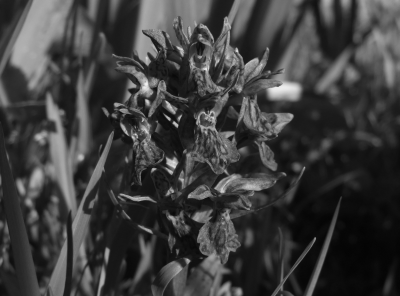

In [64]:
from utils.image_audio import load_image_gray, load_image_colour, show_image

# prints out key features of an array
def print_array(x):
    print("Shape: {shape}, dtype: '{dtype}'".format(shape=x.shape, dtype=x.dtype))
    
## Simple grayscale image. This will be a 2D array of size height * width
## Note that arrays are in row x column order!
img = load_image_gray("imgs/orchid.png")

show_image(img)

In [65]:
## This will show the dimensions "shape" and the datatype "dtype" of this array
print_array(img)

Shape: (296, 400), dtype: 'float64'


Shape: (296, 400, 3), dtype: 'float64'


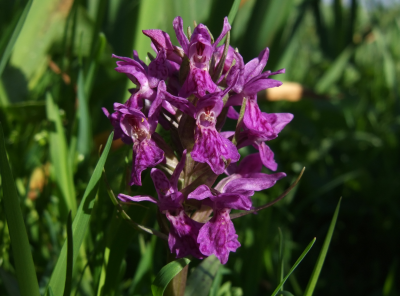

In [66]:
## Colour image example
img_colour = load_image_colour("imgs/orchid.png")
print_array(img_colour) # what will the shape be for a colour image?
show_image(img_colour) 


## Showing one colour channel
If an grayscale image is a 2D array, can we view the diffferent red, green and blue channels of the colour image somehow? **Yes**; it's easy:

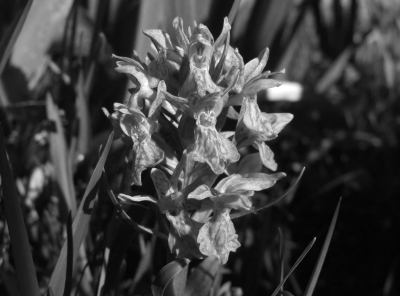

In [67]:
show_image(img_colour[:,:,0]) # red channel

This uses **slicing syntax** to select a specific part of the array; that's what the `[:,:,0]` 
means. This just means: any row, any column, first colour channel.
    
### Zero indexing
Note that NumPy arrays are indexed starting from `0`!

Try modifying the code above to look at the green and blue channels.

## More slicing
Could we select a portion of this image and show it: some kind of cropping operation? Yes; this is trivial if what we want is some **rectangular** subsection of an existing array. The slice notation
is very simple but powerful. You can give a range specifier for each dimension of the array. A range specifier is of the form:

    start : stop : step
    
Where `start` is the index to start from, `stop` is the end, and `step` is the jump to make between each step. **Any of these parts can be omitted**.

* If `start` is missing, it defaults to 0
* If `end` is missing, it defaults to the last element
* If `step` is missing, it defaults to 1. You don't need to include the second colon if you are omitting step, though it's not an error to do so.

If there is no colon at all (just a number) then the slice takes that element only (start and end are equal). Let's see that in action:



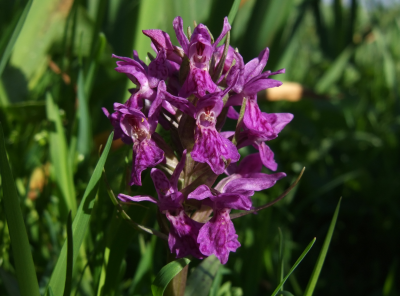

In [47]:
show_image(img_colour[:,:,:]) # show the colour image; exactly the same as show_image(img)

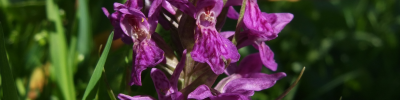

In [48]:
show_image(img_colour[100:200,:,:]) # rows 100-200

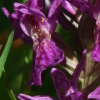

In [49]:
show_image(img_colour[100:200,100:200,:]) # rows 100-200 and columns 100-200

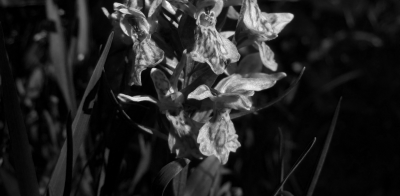

In [70]:
show_image(img_colour[100:500,:,2]) # rows 100-500 and columns 100-200, colour channel 3 (blue)

### Tabular Data
Many other data can be naturally thought of as arrays. For example, a very common structure is a spreadsheet like arrangement of data in tables, with rows and columns.
Each row is an **observation**, and each column is a **variable**.

For example, there is monthly historical data of the sunspot activity for the last ~250 years. It is in a format:

    index    year     sunspots
    1        1749.0    58
    2        1749.08   62.6
    3        1749.17   70.0
    
    ...
    
  
    

In [51]:
# this just turns off scientific notation, so the output looks sensible!
np.set_printoptions(suppress=True) 

# load and print, in a single array
sunspots = np.loadtxt("data/sunspots.csv", delimiter=',')
print_array(sunspots)
print(sunspots)

Shape: (2820, 3), dtype: 'float64'
[[    1.          1749.            58.        ]
 [    2.          1749.08333333    62.6       ]
 [    3.          1749.16666667    70.        ]
 ..., 
 [ 2818.          1983.75          55.8       ]
 [ 2819.          1983.83333334    33.3       ]
 [ 2820.          1983.91666667    33.4       ]]


Text(0,0.5,'No. of sunspots')

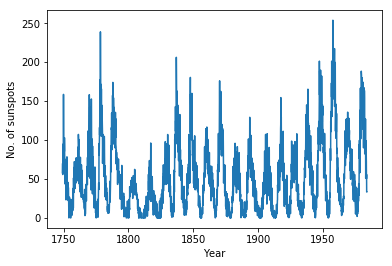

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(sunspots[:,1], sunspots[:,2])
ax.set_xlabel("Year")
ax.set_ylabel("No. of sunspots")

## Slicing
We can use slice notation to select parts of this array. For example, we can select the second column,
which is the years of observation:

In [53]:
print(sunspots[:,1]) # second column (remember 0-indexing!)

[ 1749.          1749.08333333  1749.16666667 ...,  1983.75        1983.83333334
  1983.91666667]


In [56]:
print(sunspots[0,:]) # first row (note the row=0, column=any)

[    1.  1749.    58.]


In [57]:
print(sunspots[0:10,1:]) # first ten rows, second column onwards (start specified, but not stop)

[[ 1749.            58.        ]
 [ 1749.08333333    62.6       ]
 [ 1749.16666667    70.        ]
 [ 1749.25          55.7       ]
 [ 1749.33333333    85.        ]
 [ 1749.41666667    83.5       ]
 [ 1749.5           94.8       ]
 [ 1749.58333333    66.3       ]
 [ 1749.66666667    75.9       ]
 [ 1749.75          75.5       ]]


In [58]:
# every tenth row, up to row 100, second column onwards
# note this uses the full start:stop:step slicing
print(sunspots[0:100:10,1:]) 

[[ 1749.            58.        ]
 [ 1749.83333333   158.6       ]
 [ 1750.66666667    91.2       ]
 [ 1751.5           66.3       ]
 [ 1752.33333333    59.7       ]
 [ 1753.16666667    45.7       ]
 [ 1754.             0.        ]
 [ 1754.83333333    13.2       ]
 [ 1755.66666667    17.8       ]
 [ 1756.5            3.6       ]]


In [61]:
# whole array, every sixtieth row. Note that start and stop are *both* omitted here
# and only step is given.
print(sunspots[::60,:]) 

[[    1.   1749.     58. ]
 [   61.   1754.      0. ]
 [  121.   1759.     48.3]
 [  181.   1764.     59.7]
 [  241.   1769.     73.9]
 [  301.   1774.     46.8]
 [  361.   1779.    114.7]
 [  421.   1784.     13. ]
 [  481.   1789.    114. ]
 [  541.   1794.     45. ]
 [  601.   1799.      1.6]
 [  661.   1804.     45.3]
 [  721.   1809.      7.2]
 [  781.   1814.     22.2]
 [  841.   1819.     32.5]
 [  901.   1824.     21.6]
 [  961.   1829.     43. ]
 [ 1021.   1834.      4.9]
 [ 1081.   1839.    107.6]
 [ 1141.   1844.      9.4]
 [ 1201.   1849.    156.7]
 [ 1261.   1854.     15.4]
 [ 1321.   1859.     83.7]
 [ 1381.   1864.     57.7]
 [ 1441.   1869.     60.9]
 [ 1501.   1874.     60.8]
 [ 1561.   1879.      0.8]
 [ 1621.   1884.     91.5]
 [ 1681.   1889.      0.8]
 [ 1741.   1894.     83.2]
 [ 1801.   1899.     19.5]
 [ 1861.   1904.     31.6]
 [ 1921.   1909.     56.7]
 [ 1981.   1914.      2.8]
 [ 2041.   1919.     48.1]
 [ 2101.   1924.      0.5]
 [ 2161.   1929.     68.9]
 

## Indexing
We can look at a specific value, if we completely specify the index. We call this **indexing**, where a specific value is being looked up.
    

In [62]:
print(sunspots[0,1]) # first entry in second column
# note that there is no colon here; this indexes rather than slices

1749.0


In [63]:
print(sunspots[20,2]) # 20th entry in 3rd column

91.2


## B.2 Creation

`np.array()` takes a sequence and converts it into an array; this can be, for example, an ordinary Python list:
    

In [10]:
## a simple vector: np.array converts iterable sequences to arrays
n_list = [1.0, 2.0, 3.0]
print(np.array(n_list)) # this is now an array

[ 1.  2.  3.]


## Shape
All ndarrays have a **shape**, which is the number of elements in each dimension. You can always find
the shape of an existing array by calling `a.shape()` on an array `a`. This list is just three elements, so its shape is just `(3,)` (a 3 element vector):

In [13]:
arr = np.array(n_list) # store in variable to be more convenient
print(arr.shape)

(3,)


### Multidimensional arrays
This works for creating multidimensional arrays, using nested sequences (e.g. list-of-lists). However, arrays must be **rectangular**; they cannot be *ragged*, where there are different numbers of columns per row.

In [16]:
# using nested lists to create a 2D array (a matrix)
a = np.array([
                [1.0, 2.0, 3.0],
                [0.0, 0.5, 0.0],
                [5.0, 0.0, 10.0]
               ])

print(a)

[[  1.    2.    3. ]
 [  0.    0.5   0. ]
 [  5.    0.   10. ]]


In [17]:
print(a.shape)

(3, 3)


NumPy supports arbitrary dimensioned arrays. So we can create a `2x2x2` array of numbers:

In [22]:
a = np.array([
                [[1.0, 1.0],
                 [4.0, 4.0]],
                [[2.0, 2.0],
                 [3.0, 3.0]],                
               ])
print(a)

[[[ 1.  1.]
  [ 4.  4.]]

 [[ 2.  2.]
  [ 3.  3.]]]


In [23]:
print(a.shape)


(2, 2, 2)


## Blank arrays
It's often useful to create arrays which are "blank", in the sense they are filled with equal values (particularly, filled with all zeros). There are array functions that will be produce such arrays very efficiently. They just take the shape of the desired array and return a fully populated array:

* `np.zeros(shape)` will create an array of a given **shape** and fill it with zeros. 
* `np.ones(shape)` does the same and fills it with ones (1.0).
* `np.full(shape, value)` fills a new array with the given value.
* `np.empty(shape)` creates a new array, but doesn't fill it. This will have whatever was in the memory before, so while it's very efficient, it's only useful when you expect to overwrite the array values.

### Shapes are tuples
Note: the `shape` is a **tuple**, written in round brackets like this: `(3,4)` or `(3,)`.

* **Don't** call `np.zeros(3,4)`: this calls `np.zeros` with two arguments 
* **Do** call `np.zeros((3,4))`: this calls `np.zeros` with one argument, a shape tuple.


In [24]:
print(np.zeros((5,))) # a 5 element vector of zeros

[ 0.  0.  0.  0.  0.]


In [ ]:
print(np.zeros((3,3))) # a 3x3 matrix of zeros

In [ ]:
print(np.zeros((6,2))) # a 6x2 matrix of zeros

In [ ]:
print(np.ones((2,2)) #  a 2x2 matrix of ones

In [26]:
print(np.full((1,5,1), 9)) # a 1x5x1 array of 9s


[[[9]
  [9]
  [9]
  [9]
  [9]]]


In [30]:
np.full((2,2,2), -1.0) # 2x2x2 array filled with -1

array([[[-1., -1.],
        [-1., -1.]],

       [[-1., -1.],
        [-1., -1.]]])

In [27]:
print(np.empty(8,)) # 8 element vector -- note the values will be random junk!

[ 1.  1.  4.  4.  2.  2.  3.  3.]


## Singleton axes
**Note**: a (1,5,1) array is different from a (1,5) array and different from a (5,) array. Array dimension sizes can be 1. 

We call each dimension of an array an **axis**, and any **axis** which is just one element is called a **singleton axis**.


In [29]:
# these are all differently shaped arrays, even though they all contain exactly five elements
print(np.zeros((1,5,1)).shape) 
print(np.zeros((1,5)).shape) 
print(np.zeros((5,)).shape) 

(1, 5, 1)
(1, 5)
(5,)


### zeros_like
It is often handy to create a new array which is the same type and shape as an existing array, but initialised to all zeros (or all ones). This is useful, for example, when accumulating counts in an array the same size as some original input (e.g. counting number of pixels that are blue or green)

`np.zeros_like()` does this:

In [ ]:
x = np.array([[1.0,2.0,3.0], [4.0,5.0,6.0]], dtype=np.float64)
print(x)
zeros_like_x = np.zeros_like(x)
print(zeros_like_x)

There are of course `ones_like()` and `full_like()` and `empty_like()` calls as well. Try them out yourself in the cell below:

## Random arrays
We can also generate random numbers to fill arrays. Many algorithms use arrays of
random numbers as their basic "fuel". 

Useful random array functions include:
* `np.random.randint(a,b,shape)` creates an array with uniform random *integers* between a and (excluding) b
* `np.random.uniform(a,b,shape)` creates an array with uniform random *floating point* numbers between a and b
* `np.random.normal(mean,std,shape)` creates an array with normally distributed random floating point numbers between with the given mean and standard deviation.

In [72]:
np.random.randint(1,7,(5,5)) # 5x5 array o numbers from 1 through 6 (e.g. dice rolls)

array([[4, 1, 5, 1, 3],
       [5, 4, 4, 5, 6],
       [4, 1, 6, 1, 6],
       [3, 6, 3, 4, 1],
       [4, 3, 3, 1, 3]])

In [73]:

np.random.uniform(0,1,(3,)) # 3 element vector of values from 0-1

array([ 0.18104627,  0.35856021,  0.73002007])

In [75]:
# 3 element vector of values, normally distributed with mean 0, standard deviation 1.0
np.random.normal(0,1,(3,)) 

array([-1.06650922, -0.95707526, -0.8048452 ])

We can use this for example, to add some noise to our colour image above:
    

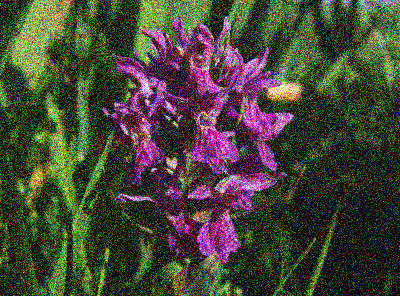

In [79]:
# we'll see a bit more about arithmetic shortly; but the code here should be obvious
# in what it does
show_image(img_colour + np.random.normal(0, 0.2, img_colour.shape))

## arange
We can create a vector of increasing values using `arange` (**a**rray **range**), which works like the built in Python function `range` does, but returns an 1D array (a vector) instead of a list.

`np.arange()` takes one to three parameters:
* `np.arange(end)`  -- returns a vector of numbers 0..end-1
* `np.arange(start, end)`  -- returns a vector of numbers start..end-1
*  `np.arange(start, end, step)` --returns a vector of numbers start..end-1, incrementing by step (which may be **negative** and/or **fractional**!)


In [94]:
np.arange(10)  # [0-10) (excluding 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
np.arange(2, 8) # 2,3,4,5,6,7 (no 8 -- the right endpoint is never included!)

array([2, 3, 4, 5, 6, 7])

In [96]:
np.arange(0,10,2) # even numbers 0-10

array([0, 2, 4, 6, 8])

In [97]:
np.arange(10,0,-2) # even numbers backwards stopping at *2* 
# (be careful and remember the right endpoint rule!)

array([10,  8,  6,  4,  2])

In [98]:
np.arange(0,10,0.25) # 0 to 10, incrementing by 0.25

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75])

In [99]:
np.arange(0.3, 10.21, 0.95) # all points can be fractional

array([ 0.3 ,  1.25,  2.2 ,  3.15,  4.1 ,  5.05,  6.  ,  6.95,  7.9 ,
        8.85,  9.8 ])

### Linspace
`np.arange` is useful for generating evenly spaced values, but it is parameterised in a form that can be awkward. For example, imagine generating 23 values between -0.5 and 2.9 *inclusive* with `np.arange()`:

In [100]:
# this is a bit ugly (and also wrong -- it omits 2.9!)
np.arange(-0.5, 2.9, (2.9+0.5)/23)

array([-0.5       , -0.35217391, -0.20434783, -0.05652174,  0.09130435,
        0.23913043,  0.38695652,  0.53478261,  0.6826087 ,  0.83043478,
        0.97826087,  1.12608696,  1.27391304,  1.42173913,  1.56956522,
        1.7173913 ,  1.86521739,  2.01304348,  2.16086957,  2.30869565,
        2.45652174,  2.60434783,  2.75217391])

`np.linspace(start, stop, steps)` is a much easier to use alternative. `linspace` stands for "**lin**early **space**d", and it generates `steps` values between `start` and `stop` **inclusive**. 

In [102]:
np.linspace(0,10,11) # careful -- end is inclusive, so we need 11 steps if we want integer spacing

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [101]:
spaced_evenly = np.linspace(-0.5, 2.9, 231)
print(spaced_evenly)

[-0.5        -0.48521739 -0.47043478 -0.45565217 -0.44086957 -0.42608696
 -0.41130435 -0.39652174 -0.38173913 -0.36695652 -0.35217391 -0.3373913
 -0.3226087  -0.30782609 -0.29304348 -0.27826087 -0.26347826 -0.24869565
 -0.23391304 -0.21913043 -0.20434783 -0.18956522 -0.17478261 -0.16
 -0.14521739 -0.13043478 -0.11565217 -0.10086957 -0.08608696 -0.07130435
 -0.05652174 -0.04173913 -0.02695652 -0.01217391  0.0026087   0.0173913
  0.03217391  0.04695652  0.06173913  0.07652174  0.09130435  0.10608696
  0.12086957  0.13565217  0.15043478  0.16521739  0.18        0.19478261
  0.20956522  0.22434783  0.23913043  0.25391304  0.26869565  0.28347826
  0.29826087  0.31304348  0.32782609  0.3426087   0.3573913   0.37217391
  0.38695652  0.40173913  0.41652174  0.43130435  0.44608696  0.46086957
  0.47565217  0.49043478  0.50521739  0.52        0.53478261  0.54956522
  0.56434783  0.57913043  0.59391304  0.60869565  0.62347826  0.63826087
  0.65304348  0.66782609  0.6826087   0.6973913   0.7121739

### Loading and saving arrays
`np.loadtxt(fname)` and `np.savetxt(arr, fname)` are simple functions to load and save single 1D or 2D arrays as ordinary text files.

In [105]:
# we've already seen an example of this
sunspots = np.loadtxt("data/sunspots.csv", delimiter=',') # comma separated
print_array(sunspots)

Shape: (2820, 3), dtype: 'float64'


In [106]:
# write to a file, then see what is in it
# a new, blank array
x = np.array([[1,2,3,4], [5,6,7,8]])
# write to "test_array.txt"
np.savetxt("test_array.txt", x)

# print out the contents of the file
# will be space separated by default, in scientific notation
print("test_array.txt")
# this is just the raw contents of the file
with open("test_array.txt") as f:
    print((f.read()))

test_array.txt
1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00
5.000000000000000000e+00 6.000000000000000000e+00 7.000000000000000000e+00 8.000000000000000000e+00



# Indexing arrays
Arrays can be indexed like lists or sequences (in Python, this uses square brackets []), but arrays can have **multidimensional** indices. These are indices which are really tuples of values.

This means we write the variable, with the index in square brackets, where the index might have comma separated values. Indices start at **zero**!

Indexing, and its counterpart slicing, are two of the most important array operations.

So we can write:

    x[0]     # 1D vector
    x[0,0]   # 2D matrix
    x[0,0,0] # 3D tensor

*Python revision*
In Python, negative indices mean *counting from the end*; so `x[-1]` is the last element, `x[-2]` is the second last, etc.

In [ ]:
test_vector = [10, 20, 30, 40]

test_matrix = np.array(
                        [
                            [1,2,3],
                            [4,5,6],
                            [7,8,9],
                        ])

In [ ]:
print((test_vector[2])) # third element of test_vector

In [ ]:
print((test_vector[0])) # first element

In [ ]:
print((test_vector[-2])) # second last element

In [ ]:
print((test_matrix[1,2])) # second row, third column (remember: rows then columns)

In [ ]:
print((test_matrix[0,0])) # top left entry

In [ ]:
print((test_matrix[-1,0])) # last row, first column

In [ ]:
test_tensor = np.array([[[1,2,3], 
                         [4,5,6]], 
                        [[7,8,9], 
                         [10,11,12]]]).T
print((test_tensor.shape))
print(test_tensor)

In [ ]:
print((test_tensor[0,0,-1]))  # first row, first column, last "channel"

In [ ]:
print((test_tensor[1,0,0]))  # second row, first column, first channel

## Slicing
If we give too few indices for an array, we get back a section or **slice** of that array, with fewer dimensions. For example, if we have a 2D array `x` with shape (5,5) and index with `x[0]` we get the whole first 5 element row of `x` as a 1D vector.

This is an extremely powerful operation.

In [107]:
first_row = test_matrix[0]
print(first_row)

NameError: name 'test_matrix' is not defined

In [ ]:
print((test_matrix[-1]))

In [ ]:
print((test_matrix[0, :])) # same as test_matrix[0]

In [ ]:
print((test_matrix[0, :])) # same as test_matrix[0]

In [ ]:
print((test_matrix[:, 0])) # first *column* of test_matrix

In [ ]:
print((test_tensor[:,:,0])) # first channel

In [ ]:
print((test_tensor[0,:,0])) # first channel, first row

In [ ]:
print((test_tensor[:,0,:])) # first columns

In [ ]:
print((test_tensor[:,:,:])) # everything

In [108]:
print((test_tensor[:])) # also everything : is assumed for other dimensions if not specified

NameError: name 'test_tensor' is not defined

## General slicing
The lone `:` and plain integers are special cases of **slicing**. Each dimensions can be indexed with a slice, where the slice is notation which follows the same principles as `arange()`, taking 0-3 parameters separated by a `:`

The general rule is:
* `a:b:c` all elements, a to b (excluding b), stepping by c

Any and all of `a`, `b`, or `c` can be omitted. `a,b,c` are always integers, but can be negative.

* `a` defaults to start of the array (0)
* `b` to the end
* `c` to 1 (stepping=1)


In [ ]:
test_vector = np.arange(1,8)
print(test_vector)

In [ ]:
# these are all the same!
print((test_vector[:4])) # first four elements
print((test_vector[0:4])) # first four elements
print((test_vector[0:4:1])) # first four elements

In [ ]:
print((test_vector[2:5])) # three element slice; 2-5=3, so we get 3 elements!

In [ ]:
print((test_vector[:])) # whole vector, using all the defaults. 
# Note that the colon is necessary; test_vector[] won't work

In [ ]:
print((test_vector[:-3])) # up to (but excluding) the last three elements
print((test_vector[-3:])) # last three elements

# note that this partitions the vector into two disjoint vectors

In [ ]:
print((test_vector[::2])) # every second element

In [ ]:
print((test_vector[1::2])) # every second element, starting at the second element

In [ ]:
# the step can be negative
print((test_vector[4::-1])) # first to 5th element, backwards

## Cropping images
An image is just a rectangular array of brightnesses, so we can crop an image using slices:

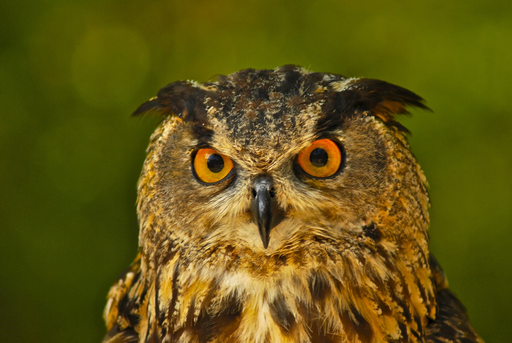

In [110]:
owl = load_image_colour("imgs/owl.png") # returns a [w,h,3] array (3 colour planes: R, G, B)
show_image(owl)

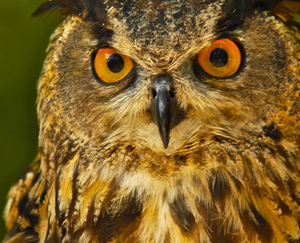

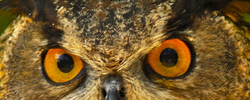

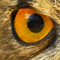

In [112]:
# slice array to keep only rows 100-400 and cols 100-400
show_image(owl[100:400, 100:400, :])
show_image(owl[100:200, 150:400, :])
show_image(owl[140:200, 180:240, :])

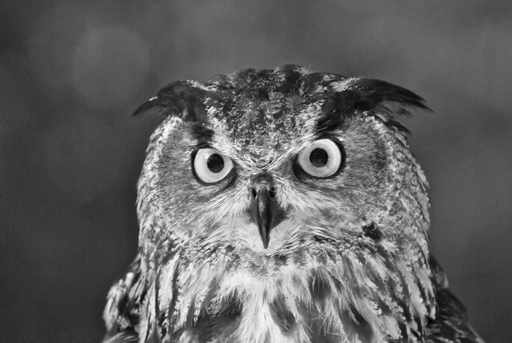

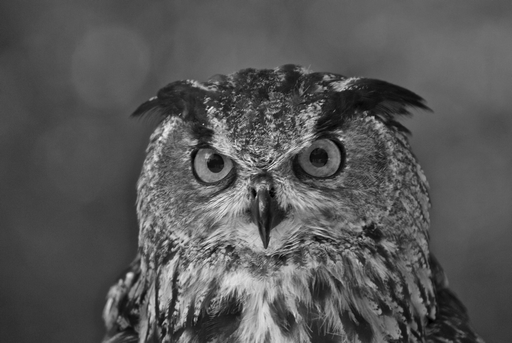

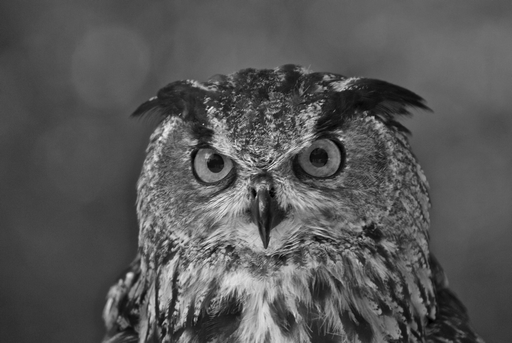

In [113]:
show_image(owl[:,:,0]) # red 
show_image(owl[:,:,1]) # green channel
show_image(owl[:,:,1]) # blue channel



In [ ]:
show_image(owl[::-1,::-1,:]) # flip it and reverse it (reversed rows, reversed columns)


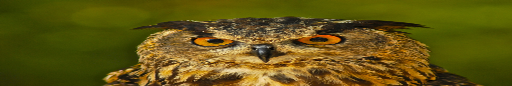

In [114]:
show_image(owl[::4,:,:]) # squash it

## Slice assignments
Note that slicing in assignments too.
So we can set one whole row to a value or a one whole column with a simple operation:

In [129]:
cross = np.zeros((8,8))
cross[:,3] = 1 # row 3 set to 1 
cross[3,:] = 2 # row 4 set to 2
print(cross)

[[ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]]


In [130]:
cross[:4, :4] = np.array([1,8,-1,8])
print(cross)

[[ 1.  8. -1.  8.  0.  0.  0.  0.]
 [ 1.  8. -1.  8.  0.  0.  0.  0.]
 [ 1.  8. -1.  8.  0.  0.  0.  0.]
 [ 1.  8. -1.  8.  2.  2.  2.  2.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]]


In [132]:
# using a step in an assignment is fine
blank = np.zeros((8,8))
blank[:,::2] = [1,2,3,4] 
print(blank)

[[ 1.  0.  2.  0.  3.  0.  4.  0.]
 [ 1.  0.  2.  0.  3.  0.  4.  0.]
 [ 1.  0.  2.  0.  3.  0.  4.  0.]
 [ 1.  0.  2.  0.  3.  0.  4.  0.]
 [ 1.  0.  2.  0.  3.  0.  4.  0.]
 [ 1.  0.  2.  0.  3.  0.  4.  0.]
 [ 1.  0.  2.  0.  3.  0.  4.  0.]
 [ 1.  0.  2.  0.  3.  0.  4.  0.]]


## Rearranging arrays

Arrays can be transformed and reshaped; this means that they keep the same elements, but the arrangements of the elements are changed. For example, the sequence 
    
    [1,2,3,4,5,6]
    
could be rearranged into

    [6,5,4,3,2,1]

which has the same elements but now ordered backwards. 

These operations are often very useful to rearrange arrays so that broadcasting operations can be carried out effectively.

## Transposition
A particularly useful transformation of an array is the **transpose** which exchanges rows and columns (this isn't the same as rotating 90 degrees!). There is special syntax for this because it is so often used:

We write `x.T` to get the transpose of `x`.

In [ ]:
# square example
x = np.array([[1,2,3],[0,0,0],[3,2,1]])       
print("Original")
print(x)

In [ ]:
print("Transposed")
print((x.T))

In [ ]:
# non square example
print("Original")
y = np.array([[1,2], [3,4], [5,6]])
print(y)

In [ ]:
print("Transposed")
print((y.T))

Transposition has *no effect* on a 1D array, and it reverses the order of all dimensions in >2D arrays.

In [115]:
tensor = np.zeros((10,5,60,2))  # 10 x 5 x 60 x 2 array
print(("Original shape", tensor.shape))
print(("Transposed shape", tensor.T.shape)) # dimensions in reverse order

('Original shape', (10, 5, 60, 2))
('Transposed shape', (2, 60, 5, 10))


In [116]:
## show that transpose is fast, and does not depend on array sizze
x300 = np.zeros((3000,3000))
x3 = np.zeros((3,3))

In [117]:
%%timeit
x3.T

202 ns ± 10.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [118]:
%%timeit
x300.T

199 ns ± 2.13 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


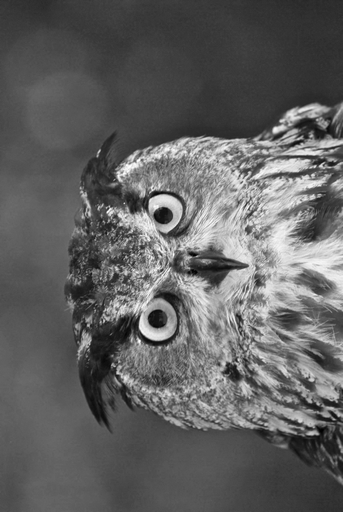

In [120]:
show_image(owl[:,:,0].T) # red channel, transposed

In [ ]:
x = np.array([[1,2,3],[0,0,0],[3,2,1]])              
print(x)
show_image(owl)

In [ ]:
print((np.flipud(x)))
show_image(np.flipud(owl))

In [ ]:
# flip left-right
print((np.fliplr(x)))
show_image(np.fliplr(owl))

In [ ]:
# rotate 90
print((np.rot90(x)))

show_image(np.rot90(owl))

#### Symmetric owls

In [ ]:
# split the owl into a left and right half
h,w,d = owl.shape
left = owl[:, :w//2, :]  # //2 just means integer division by 2 (i.e. no floating point part)
right = owl[:, w//2:, :]
## we'll see concatenate in a moment
show_image(np.concatenate([left, np.fliplr(left)], axis=1))

In [ ]:
show_image(np.concatenate([np.fliplr(right), right], axis=1))

In [ ]:
# Cut+tape operations
## Joining and stacking
We can also join arrays together. But unlike simple structures like lists, we have to explicitly state on which **dimension** we are going to join. And we must adhere to the rule that the output array has rectangular shape; we can't end up with a "ragged" array. (arrays are *always* rectangular)

<img src="imgs/join.png" width="300px">

### concatenate and stack
Because arrays can be joined together along different axes, there are two distinct kinds of joining:
* We can use `concatenate` to join along an *existing* dimension;
* or `stack` to stack up arrays along a *new dimension.*

In [ ]:
x = np.array([1,2,3,4])
y = np.array([5,6,7,8])
print("Stacked two 1D -> 2D")
print((np.stack([x,y])))
print("Concatenated two 1D -> 1D")
print((np.concatenate([x,y])))

In [ ]:
# when we have multiple dimensions, we can specify explicitly
# which axis to join on
x = np.zeros((3,3))
y = np.ones((3,3))
print("Joined on rows")
print((np.concatenate([x,y], axis=0)))  # join on rows
print()
print("Joined on columns")
print((np.concatenate([x,y], axis=1)))  # join on columns
print()

## 2D stacking shorthands
As a shorthand, there are three defined stacking operations for specific axes:
    * `np.hstack()` stacks horizontally
    * `np.vstack()` stacks vertically
    * `np.dstack()` stacks "depthwise" (i.e. one matrix on top of another)
All of these operate on 2D matrices only

In [ ]:
print((np.hstack([x,y])))  # same as np.concatenate([x,y], axis=0)

In [ ]:
print((np.vstack([x,y])))  # same as np.concatenate([x,y], axis=1)

In [ ]:
print((np.dstack([x,y])))  # same as np.stack([x,y])

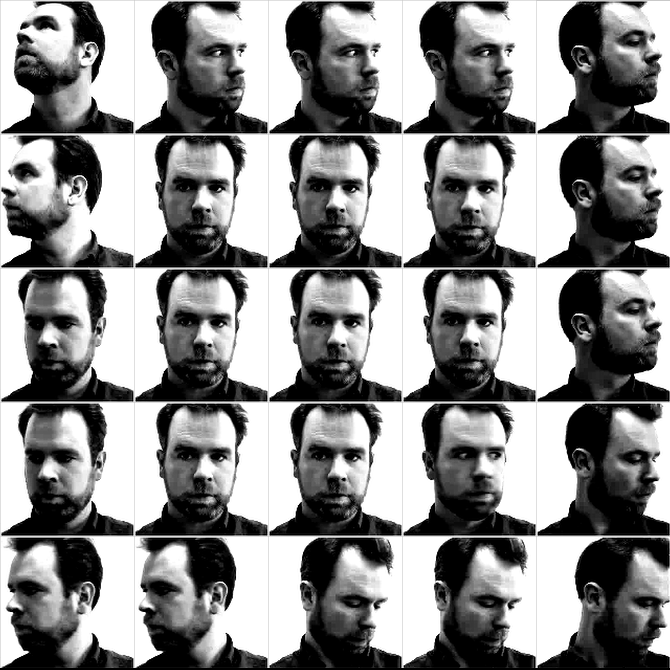

In [122]:
faces = load_image_gray("imgs/faces_5.png") # my face image from the intro lecture
show_image(faces, width="300px")

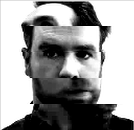

In [123]:
# don't worry about the reshape -- we'll discuss this next week
face_array = faces.reshape(5,134,5,134).swapaxes(1,2)

# chop up my face from different chunks in a diagonal path and reassemble using concatenate
slices =[]
for i in range(5):
    slices.append(face_array[i,i,i*26:(i+1)*26,:])
    
show_image(np.concatenate(slices, axis=0), width="300px")

## Tiling
We often need to be able to **repeat** arrays. This is called **tiling** and `np.tile(a, tiles)` will repeat `a` in the shape given by `tiles`, joining the result together into a single array.

In [ ]:
eye = np.array([[1.,0.], [0.,-1.]])
print(eye)

In [ ]:
print("Repeated 4 times, columns")
np.tile(eye, (1,4))

In [ ]:
print("Repeated 4 times, rows")
np.tile(eye, (4,1))

In [ ]:
print("Repeated 2x2x2x2 times")
np.tile(eye, (2,2,2,2)) # 4D array!

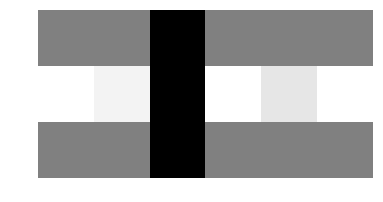

In [125]:
from utils.image_audio import show_image_mpl
fret = np.array([[0.5, 0.5,0,0.5, 0.5,0.5], 
                 [1,0.95, 0, 1,0.9,1],
                 [0.5, 0.5, 0, 0.5, 0.5,0.5]])
show_image_mpl(fret)

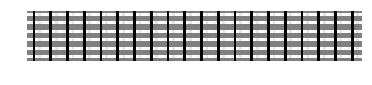

In [126]:
show_image_mpl(np.tile(fret, (6, 20)))
# <-- insert rest of guitar here

# Arithmetic and functions on arrays

The major advantage of array representations is to be able to do arithmetic on arrays directly. The simplest arithmetic is **elementwise arithmetic**, which applies the same function to each element of an array.

For example, adding a value to every element of an array

In [127]:
x = np.ones((3,3))
print((x+1))

[[ 2.  2.  2.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]]


In [ ]:
y = np.array([1,2,3,4])
print((y**2 + 1)) # square plus one

This works for standard mathematical functions like `abs()` and `cos()` as well:

In [ ]:
x = [-5, 6, 10, -18, 3]
print((np.abs(x))) # absolute value

In [ ]:
print((np.cos(x))) # cosine

In [ ]:
x = np.arange(-10,10,0.1) # generate numbers from -10 to 10, spaced by 0.1
plt.plot(x, np.tanh(x))  # x against tanh(x) in range [-10,10]

## Elementwise operations
Other functions like `maximum` and `minimum` are slightly more subtle. These are **dyadic** functions (they take two arguments) and the operate on two arrays of the **same size**, and pair one element from the left hand array with a matching element from the right hand array. These are **elementwise** operations.

In [ ]:
x = np.array([1,2,3,4])
y = np.array([10,0,0,10])

print((np.maximum(x,y)))

In [ ]:
print((np.minimum(x,y)))

This also works for elementwise array arithmetic: for example adding two arrays of the same shape together:


In [ ]:
print((x+y)) # each element of x added to each element of y

In [ ]:
x = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])

z = np.array([[1,0,1], 
              [-1,1,-1], 
              [-1,0,-1]])

print((x * z)) 
print()
print((np.multiply(x,z))) # the same thing, but as a function

### Scalar and array arithmetic

We distinguish **scalar arithmetic** (x+1) from **array arithemetic** (x+y)

In [ ]:
print((x + 1)) # adds one to every element of x
print((x + z)) # adds x to y

In [ ]:
x2 = np.array([[1,2,3], [4,5,6], [7,8,9]])
y2 = np.array([[1,-1,1], [-1,1,-1], [1,-1,1]])

print(x2)
print()
print(y2)
print()
print((x2+y2))

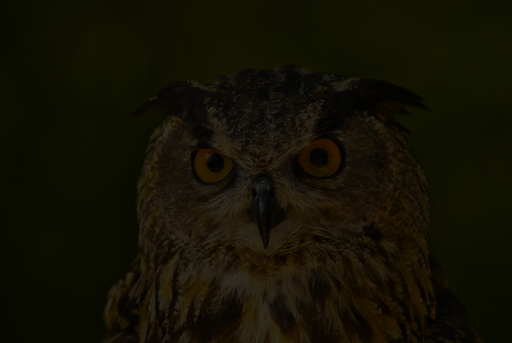

In [134]:
# dark owl
show_image(owl*0.2)

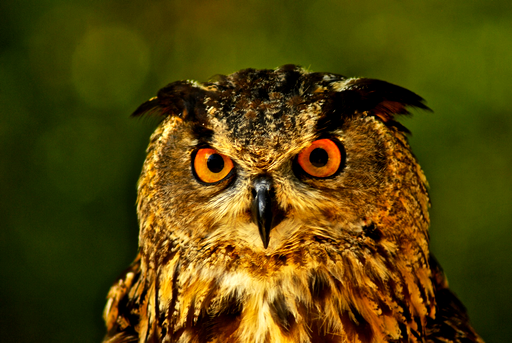

In [141]:
# contrast adjusted owl
show_image(np.tanh((owl-0.5)*1.5)+0.5)

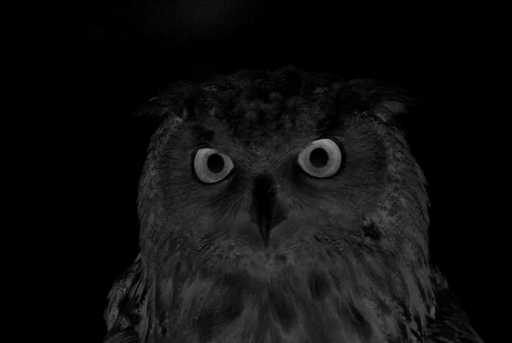

In [142]:
# difference or red and green channels
show_image(owl[:,:,0] - owl[:,:,1])

## Simultaneous operations 
We can use the arithmetic functions to do things like compute the ratio of two columns of data, just as in a spreadsheet. 
Here we will use a simple dataset, "Wheat prices in England, 1565-1810" by William Playfair:

In [128]:
# the price of wheat 1565-1810 in format:
#      index, year, wheat price, weekly wage
# price: shillings per quarter bushel
# wage: shillings per week
wheat = np.loadtxt("data/wheat.csv", delimiter=",")
print(wheat)

[[    1.    1565.      41.       5.  ]
 [    2.    1570.      45.       5.05]
 [    3.    1575.      42.       5.08]
 [    4.    1580.      49.       5.12]
 [    5.    1585.      41.5      5.15]
 [    6.    1590.      47.       5.25]
 [    7.    1595.      64.       5.54]
 [    8.    1600.      27.       5.61]
 [    9.    1605.      33.       5.69]
 [   10.    1610.      32.       5.78]
 [   11.    1615.      33.       5.94]
 [   12.    1620.      35.       6.01]
 [   13.    1625.      33.       6.12]
 [   14.    1630.      45.       6.22]
 [   15.    1635.      33.       6.3 ]
 [   16.    1640.      39.       6.37]
 [   17.    1645.      53.       6.45]
 [   18.    1650.      42.       6.5 ]
 [   19.    1655.      40.5      6.6 ]
 [   20.    1660.      46.5      6.75]
 [   21.    1665.      32.       6.8 ]
 [   22.    1670.      37.       6.9 ]
 [   23.    1675.      43.       7.  ]
 [   24.    1680.      35.       7.3 ]
 [   25.    1685.      27.       7.6 ]
 [   26.    1690.      40

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(wheat[:,1], wheat[:,2], label="Wheat price")
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage")
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")

In [ ]:
# compute number of loaves afforded each week
# do arithmetic: units of wheat are in quarter bushels, and we get 42 loaves of bread per bushel
loaves_per_bushel = 42
loaves_afforded =  wheat[:,3]/wheat[:,2] * loaves_per_bushel * 0.25
print(loaves_afforded)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(wheat[:,1], loaves_afforded)
ax.set_xlabel("Year")
ax.set_ylabel("Loaves of bread per week")

## Boolean tests
We can do tests (like equality, greater than, etc.) on arrays as well: the result is a **Boolean array**

In [143]:
x2 = np.array([[1,2,3], [4,5,6], [7,8,9]])
y2 = np.array([[1,-1,1], [-1,1,-1], [1,-1,1]])

In [144]:
print(x2)
print((x2>5))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[False False False]
 [False False  True]
 [ True  True  True]]


In [145]:
print(y2)
print((x2>y2))

[[ 1 -1  1]
 [-1  1 -1]
 [ 1 -1  1]]
[[False  True  True]
 [ True  True  True]
 [ True  True  True]]


In [146]:
# we can freely combine comparisons and arithmetic
print((x2 == y2+2))

[[False False  True]
 [False False False]
 [False False False]]


### any and all
`np.any` and `np.all` test if an array of Boolean values is all True or not all False (i.e. if any element is True).

This means we can test the equality of two arrays like this:

In [ ]:
a = np.zeros((2,2))
b = np.zeros((2,2))
c = np.ones((2,2))
print((a==b)) # a boolean array
print((np.all(a==b))) # a single boolean
print((np.all(a==c)))

In [ ]:
x = np.array([1,2,3,4])
y = np.array([1,1,1,5])
print((x>y))
print((np.any(x>y)))
print((np.all(x>y)))

In [ ]:
## Aggregate functions
**Aggregate functions** or **reductions** combine together many elements in a simple way to produce an *aggregate* result. These include operations like minimum, maximum, sum. 

#### Min, max
For example, finding the maximum or minimum of an array:

In [ ]:
wheat_price = wheat[:,2]
print(np.min(wheat_price), np.max(wheat_price))

*Note carefully the difference between two argument `maximum(a,b)`, which the elementwise max of `a` and `b`, whereas `np.max(a)` takes one argument returns the maximum element of `a`*

#### Mean, median, standard deviation
Standard statistical functions like the sum, mean, median and standard deviation are built in:

In [ ]:
wheat_price = wheat[:,2]
print(("mean price", np.mean(wheat_price), "median price", np.median(wheat_price)))
print(("std. dev. price", np.std(wheat_price)))
print(("sum of prices", np.sum(wheat_price)))

In [ ]:
print((np.mean(wheat)))

In [ ]:
# mean across rows; i.e. per column
print((np.mean(wheat, axis=0)))

In [ ]:
# or the total sum across the columns
print((np.sum(wheat, axis=0)))

### Multiple axes
You can specify a list of axes across which to operate. This is mainly used with arrays with more than two dimensions.

In [148]:
x = np.array([[[1,2,3], [4,5,6]], [[1,2,3], [4,5,6]]])


print(np.mean(x, axis=(0,1)))

[ 2.5  3.5  4.5]


#### Image example
We can see the effect more clearly in an image, where the means across rows and means across columns are quite different

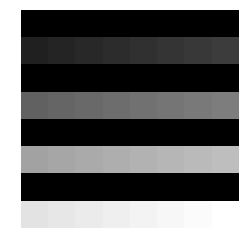

In [150]:
x = np.linspace(0,1,64).reshape(8,8)
x[::2,:] = 0
show_image_mpl(x) # stripy image

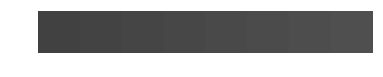

In [151]:
show_image_mpl(np.mean(x, axis=0).reshape(1,8))

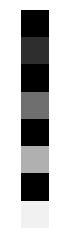

In [152]:
show_image_mpl(np.mean(x, axis=1).reshape(8,1))

## sort, argsort, argmin, argmax
A very useful operation is to find the **index** of the biggest or smallest element in an array.
This, for example, can be used to find the row where one column is biggest, and lookup up
values in the other columns (like `vlookup` in Excel). 

This operation is called `argmax` or `argmin`

In [ ]:
# back to the wheat example

max_ix = np.argmax(loaves_afforded)
print(("index of most expensive loaf", max_ix))

# the year when wheat was most affordable
print(("Cheapest year", wheat[max_ix,1]))

# the year when wheat was least affordable
print(("Most expensive year", wheat[np.argmin(loaves_afforded),1]))

## Sorting
Arrays can be sorted (of course!), but the axis to sort over must be specified (a 2D or higher sort does not have a clear meaning)

In [ ]:
# sort wheat prices
print((np.sort(wheat[:,2])))

In [147]:
# show the effect of axis on sorting
x2d = np.array([[50,10,60], [30, 20, 80], [90,70, 40]])
print("Original")
print(x2d)
print("Row sorted")
print((np.sort(x2d, axis=0))) # sort by rows
print("Column sorted")
print((np.sort(x2d, axis=1))) # sort by column

Original
[[50 10 60]
 [30 20 80]
 [90 70 40]]
Row sorted
[[30 10 40]
 [50 20 60]
 [90 70 80]]
Column sorted
[[10 50 60]
 [20 30 80]
 [40 70 90]]


## argsort
Like with `max` and `argmax`, there is a function `argsort`, which returns the **indices such that the array would be sorted**. This is very useful when one vector (or column) needs to be sorted, and the corresponding entries in matched vectors must be looked up. For example, this can be used to emulate the effect of a sort in a spreadsheet like Excel.

**This is an incredibly useful function!**

In [ ]:
price = wheat[:,2]
year = wheat[:,1]

argsort = np.argsort(price)
print(argsort)  # the indexing that would make price ordered

In [ ]:
print((price[argsort])) # prices, in order

In [ ]:
print((year[argsort])) # years, in the order that matches the sorted price order

## Cumulative sums
We often want cumulative sums over an axis.

`np.cumsum` does this operation (yes, that really is its name).  This is very useful for operations where a quantity is measured over time, but the total amount observed/consumed/processed/etc. at intermediate points is of interest. The last element of the cumulative sum is equal to the sum `np.cumsum(x)[-1]==np.sum(x)`



In [ ]:
x = np.array([1,1,1,1,1])
print((np.cumsum(x)))

In [ ]:
# just plot the sunspot data again
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sunspots = np.loadtxt("data/sunspots.csv", delimiter=',')
ax.plot(sunspots[:,1], sunspots[:,2])
ax.set_title("Sunspots seen 1750-1984")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# using cumulative sum to plot the total number of sunspots seen
ax.plot(sunspots[:,1], np.cumsum(sunspots[:,2]))
ax.set_title("Total number of sunspots seen since 1750")

Diff
The inverse operation to the cumulative sum is the difference of an array. This returns an array with one element less than we started with, because it computes the difference between successive elements:

In [ ]:
x = np.array([1,2,3,4,5,6])
print(("x", x))
print(("np.diff(x)", np.diff(x)))
print(("Length of x", len(x)))
print(("Length of np.diff(x)", len(np.diff(x))))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# using difference
ax.plot(sunspots[1:,1], np.diff(sunspots[:,2]))
ax.set_title("Monthly change in sunspots seen since 1750")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# using cumulative sum
ax.scatter(sunspots[:,2], np.gradient(sunspots[:,2]), s=0.5)
ax.set_title("dsunpots vs sunspots")
ax.set_xlabel("Number of sunspots")
ax.set_ylabel("Monthly change in number of sunspots")

`np.gradient`, unlike `np.diff` will also by default return the running difference along each possible axis in one go, as multiple return values:

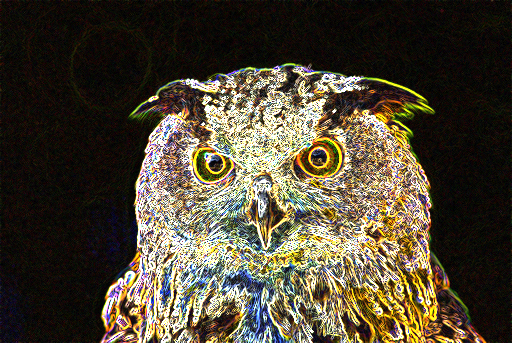

In [154]:
# dr is the gradient over rows, dc the gradient over columns
dr, dc, drgb = np.gradient(owl)  

# compute the total gradient, which will reveal edges in the image
show_image(np.sqrt(dr**2 + dc**2) * 10)

### Gradient
It can be frustrating that `np.diff` gives back an array with one element less than its input. `np.gradient` does the same thing as `np.diff`, but uses *central differences* to compute a differenced array that is of the same shape as its input. For example, we can use this to plot the change in sunspot activity against the sunspot activity:

## Exercises

C.1 Create an array `x` of shape (4,) containing only zeros. 
C.2 Create an array `y` containing the values [1,2,3,4].
C.3 Create an array `z` containing the elementwise sum of `x` and `y`.
C.4 Find the sum of the square of the elements of `y`, and store it in `y_sqr_sum`.
C.5 Create an array 'q' of shape (3,3), all elements equal to 2, and an array `p` also (3,3), all elements equal to 5
C.6 Create an array `pq` by joining `p` and `q` in the pattern: 

    pq = p q
         q p
         
C.7 


## Mark summary
You should check the marks you've got before submitting. To do this, SAVE THE NOTEBOOK, Restart the kernel, then run each cell in the notebook in turn until you get to this one. 

Note that this is an estimated mark, and if you don't do this procedure carefully you may get nonsense results.

In [5]:
summarise_marks()